<a href="https://colab.research.google.com/github/ramoneirao/Teste-Cluster/blob/main/ClusteringTeste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
#carregando o dataset
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Base De Dados/tweetEmotionsPTBR.xlsx')

# Filtrar linhas com os sentimentos desejados
sentimentos_desejados = ['agressividade', 'antecipacao', 'raiva']
df = df[df['sentimento'].isin(sentimentos_desejados)]

In [ ]:
df.head()

In [150]:
descartar = ['UserTags', 'replys', 'reTweets', 'likes', 'sentimento']
df = df.drop(descartar, axis=1, errors='ignore')

In [151]:
# extraindo somente as frases
frases = df.texto

In [152]:
from sklearn.feature_extraction.text import TfidfVectorizer

# criando o vectorizer
vectorizer = TfidfVectorizer()

# vetorizando os textos
textos_vec = vectorizer.fit_transform(frases)

In [153]:
from sklearn.cluster import KMeans

# clusterizando os textos utilizando o k-means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
                max_iter=500, random_state=42)

kmeans.fit(textos_vec)

KMeans(max_iter=500, n_clusters=3, n_init=5, random_state=42)

In [154]:
# criando um dataset para guardar os resultados
results = pd.DataFrame()
results['textos'] = frases
results['cluster'] = kmeans.labels_

results.to_excel('resultados_clusters.xlsx', index=False)

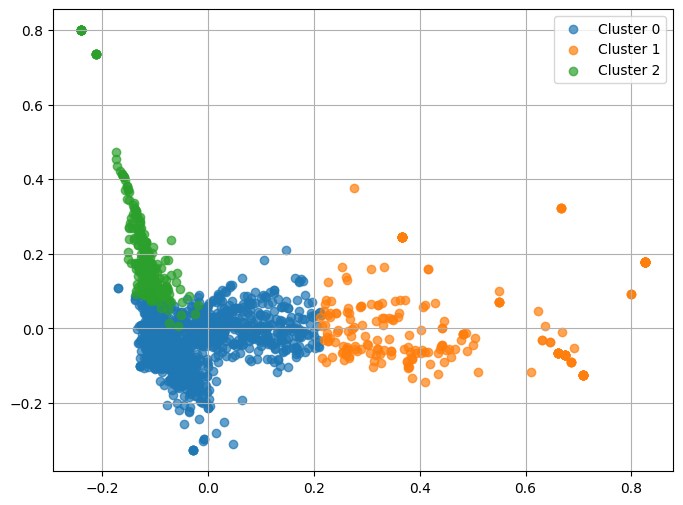

In [155]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduzindo a dimensionalidade para 2 componentes usando PCA
pca = PCA(n_components=2)
textos_vec_reduzido = pca.fit_transform(textos_vec.toarray())

# Plotando os pontos coloridos por cluster
plt.figure(figsize=(8, 6))
for cluster in range(num_clusters):
    plt.scatter(textos_vec_reduzido[results['cluster'] == cluster, 0],
                textos_vec_reduzido[results['cluster'] == cluster, 1],
                label=f'Cluster {cluster}',
                alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

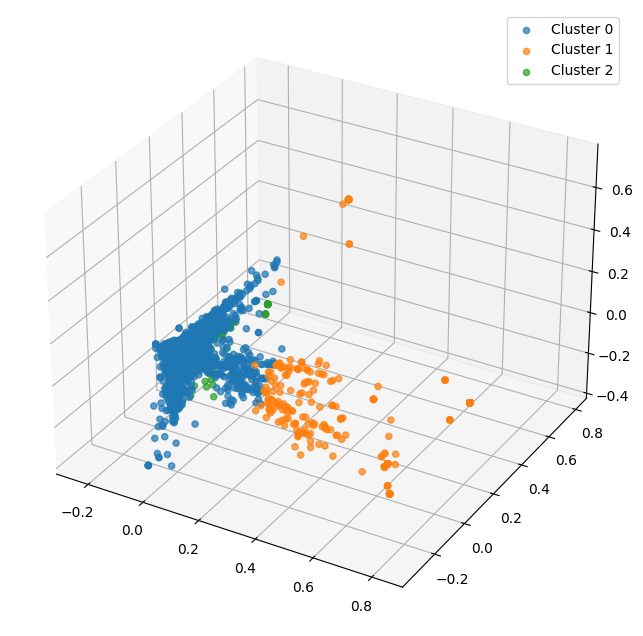

In [156]:
from mpl_toolkits.mplot3d import Axes3D

# Reduzindo a dimensionalidade para 3 componentes usando PCA
pca = PCA(n_components=3)
textos_vec_reduzido = pca.fit_transform(textos_vec.toarray())

# Criando a figura e o subplot tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotando os pontos coloridos por cluster
for cluster in range(num_clusters):
    ax.scatter(textos_vec_reduzido[results['cluster'] == cluster, 0],
               textos_vec_reduzido[results['cluster'] == cluster, 1],
               textos_vec_reduzido[results['cluster'] == cluster, 2],
               label=f'Cluster {cluster}',
               alpha=0.7)

# Adicionando uma legenda
ax.legend()

# Exibindo o gráfico
plt.show()